# Yellowbrick Library - Elbow Method and Silhouette Analysis

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

iris = load_iris()

## Importing the dataset

In [2]:
print(iris['feature_names']) # displays ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(iris['target_names']) # displays array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

X = iris['data']
#So, we have 4 features to cluster and they should be separated in 3 different clusters according to what we already know.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


## Using the elbow method to find the optimal number of clusters

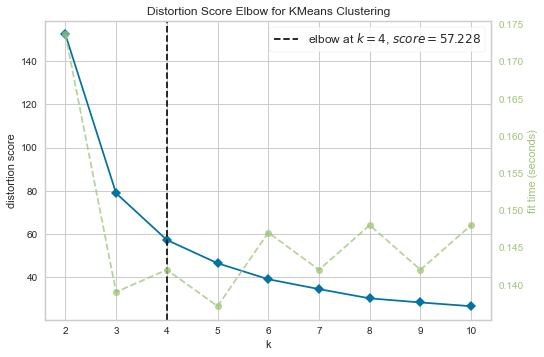

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X)    
elb_visualizer.show()

## Silhouette analysis

Will Silhouette also indicate that there are 4 clusters? To answer that, we just need to repeat the last code with a model with 4 clusters and a different visualizer object:

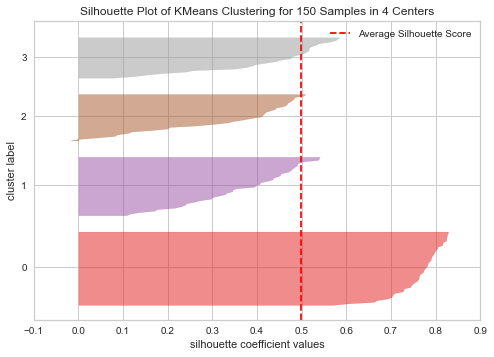

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [4]:
model_4clusters = KMeans(n_clusters = 4, init = 'k-means++', random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clusters)
sil_visualizer.fit(X)    
sil_visualizer.show()

To analyze this clusters, we need to look at the value of the silhouette coefficient (or score), its best value is closer to 1. The average value we have is 0.5, marked by the vertical line, and not so good.

Let's repeat the same plot for 3 clusters to see what happens:

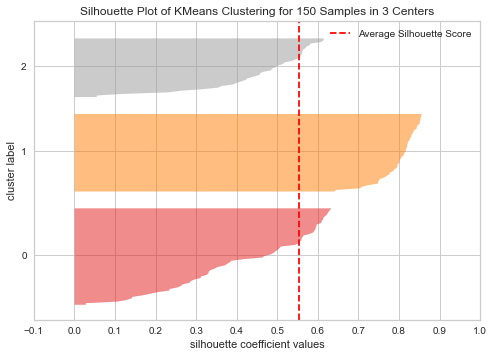

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [5]:
model_3clusters = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)

sil_visualizer = SilhouetteVisualizer(model_3clusters)
sil_visualizer.fit(X)
y_kmeans = model_3clusters.fit_predict(X)
sil_visualizer.show()

By changing the number of clusters, the silhouette score got 0.05 higher and the clusters are more balanced.

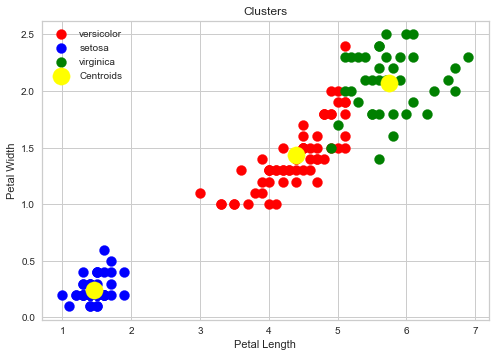

In [6]:
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'versicolor')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'setosa')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'virginica')
plt.scatter(model_3clusters.cluster_centers_[:, 2], model_3clusters.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()